In [ ]:
'''
Réaliser, sous scikit-fuzzy, une application d’aide à la conduite d’un 
véhicule, (système de freinage intelligent):
 On considère que la vitesse et la distance entre deux véhicules 
seront représentées par 5 valeurs linguistiques et le freinage par 7 
valeurs linguistiques.
 On suppose que la vitesse maximale du véhicule est de 200 Km/h 
, la distance maximale qui nous intéresse entre les deux véhicules 
est de 100 m et le freinage varie entre 0 et 100


'''


In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [10]:
vitesse=ctrl.Antecedent(np.arange(0,200,1),'vitesse')
distance=ctrl.Antecedent(np.arange(0,100,1),'distance')
freinage=ctrl.Consequent(np.arange(0,100,1),'freinage')

In [11]:
# Création des fonctions d'appartenance
# Définition des ensembles flous pour l'âge
vitisse['trespetit'] = fuzz.tramf(vitisse.universe, [0, 0, ,40])
vitisse['petit'] = fuzz.tramf(vitisse.universe, [40, 60, 100])
vitisse['moyen'] = fuzz.tramf(vitisse.universe, [60, 100, 120])
vitisse['grand'] = fuzz.tramf(vitisse.universe, [100, 120, 160])
vitisse['tresgrand'] = fuzz.tramf(vitisse.universe, [160, 200, 200])
vitisse.view()

SyntaxError: invalid syntax (3716291072.py, line 3)

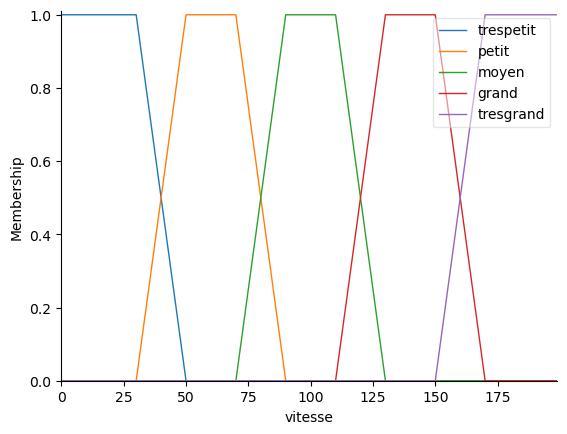

In [12]:
vitesse['trespetit'] = fuzz.trapmf(vitesse.universe, [0, 0,30 ,50])
vitesse['petit'] = fuzz.trapmf(vitesse.universe, [30, 50,70 ,90])
vitesse['moyen'] = fuzz.trapmf(vitesse.universe, [70, 90, 110,130])
vitesse['grand'] = fuzz.trapmf(vitesse.universe, [110, 130, 150,170])
vitesse['tresgrand'] = fuzz.trapmf(vitesse.universe, [150, 170,200,200])
vitesse.view()

In [ ]:
age['trespetit'] = fuzz.trimf(age.universe, [20, 20, 40])
age['petit'] = fuzz.trimf(age.universe, [20, 40, 65])
age['moyen'] = fuzz.trimf(age.universe, [40, 65, 65])
age['g'] = fuzz.trimf(age.universe, [20, 40, 65])
age['grand'] = fuzz.trimf(age.universe, [40, 65, 65])
age['moyen'] = fuzz.trimf(age.universe, [20, 40, 65])
age['grand'] = fuzz.trimf(age.universe, [40, 65, 65])
age.view()

In [ ]:
# Définition des règles
rule1 = ctrl.Rule(age['moyen'] & salaire['moyen'], montant_credit['moyen'])
rule2 = ctrl.Rule(age['petit'] & salaire['petit'], montant_credit['TrèsPetit'])
# Règles supplémentaires

rule3 = ctrl.Rule(age['moyen'] & salaire['petit'], montant_credit['petit'])
rule4 = ctrl.Rule(age['grand'] & salaire['petit'], montant_credit['petit'])

rule5 = ctrl.Rule(age['petit'] & salaire['moyen'], montant_credit['TrèsPetit'])

rule6 = ctrl.Rule(age['grand'] & salaire['moyen'], montant_credit['moyen'])

rule7 = ctrl.Rule(age['petit'] & salaire['grand'], montant_credit['petit'])
rule8 = ctrl.Rule(age['moyen'] & salaire['grand'], montant_credit['grand'])
rule9 = ctrl.Rule(age['grand'] & salaire['grand'], montant_credit['TrèsGrand'])

In [ ]:
# Création du système de contrôle
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping= ctrl.ControlSystemSimulation(tipping_ctrl)


In [ ]:
# Entrées
tipping.input['age'] = 6.5
tipping.input['salaire'] = 9.8
# Calcul de la sortie
tipping.compute()


In [ ]:
# Affichage de la valeur de sortie
print("Estimation du pourboire :", tipping.output['montant_credit'])

# Visualisation de l'activation des règles
montant_credit.view(sim=tipping)

C:\Users\LENOVO\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Niveau de freinage estimé : 91.1904761904762


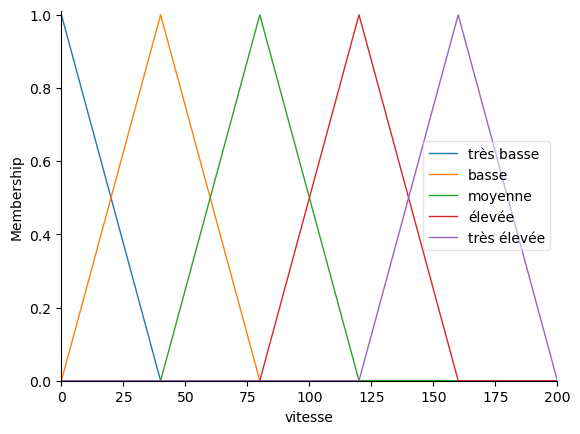

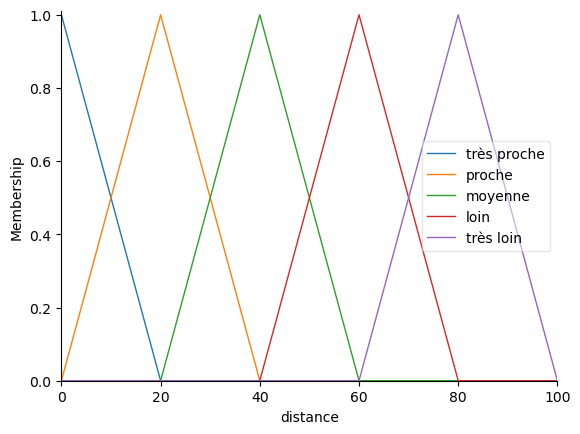

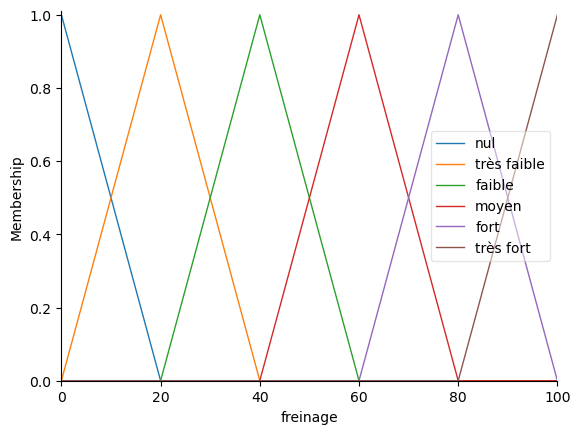

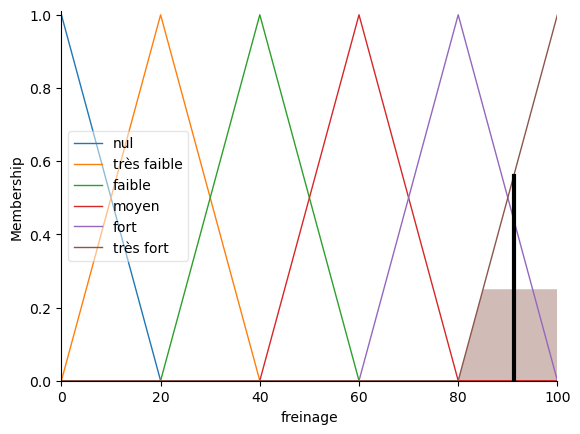

In [17]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Définition des ensembles flous
vitesse = ctrl.Antecedent(np.arange(0, 201, 1), 'vitesse')
distance = ctrl.Antecedent(np.arange(0, 101, 1), 'distance')
freinage = ctrl.Consequent(np.arange(0, 101, 1), 'freinage')

# Définition des fonctions d'appartenance
vitesse['très basse'] = fuzz.trimf(vitesse.universe, [0, 0, 40])
vitesse['basse'] = fuzz.trimf(vitesse.universe, [0, 40, 80])
vitesse['moyenne'] = fuzz.trimf(vitesse.universe, [40, 80, 120])
vitesse['élevée'] = fuzz.trimf(vitesse.universe, [80, 120, 160])
vitesse['très élevée'] = fuzz.trimf(vitesse.universe, [120, 160, 200])
vitesse.view()
distance['très proche'] = fuzz.trimf(distance.universe, [0, 0, 20])
distance['proche'] = fuzz.trimf(distance.universe, [0, 20, 40])
distance['moyenne'] = fuzz.trimf(distance.universe, [20, 40, 60])
distance['loin'] = fuzz.trimf(distance.universe, [40, 60, 80])
distance['très loin'] = fuzz.trimf(distance.universe, [60, 80, 100])
distance.view()
freinage['nul'] = fuzz.trimf(freinage.universe, [0, 0, 20])
freinage['très faible'] = fuzz.trimf(freinage.universe, [0, 20, 40])
freinage['faible'] = fuzz.trimf(freinage.universe, [20, 40, 60])
freinage['moyen'] = fuzz.trimf(freinage.universe, [40, 60, 80])
freinage['fort'] = fuzz.trimf(freinage.universe, [60, 80, 100])
freinage['très fort'] = fuzz.trimf(freinage.universe, [80, 100, 100])
freinage.view()
# Définition des règles
rule1 = ctrl.Rule(vitesse['très élevée'] & distance['très proche'], freinage['très fort'])
rule2 = ctrl.Rule(vitesse['élevée'] & distance['proche'], freinage['fort'])
# Ajoutez d'autres règles selon vos besoins

# Création du système de contrôle
systeme_freinage = ctrl.ControlSystem([rule1, rule2])  # Ajoutez d'autres règles ici si nécessaire
simulation_freinage = ctrl.ControlSystemSimulation(systeme_freinage)

# Entrées
simulation_freinage.input['vitesse'] = 190  # Exemple de vitesse
simulation_freinage.input['distance'] = 10  # Exemple de distance

# Calcul de la sortie
simulation_freinage.compute()

# Affichage de la valeur de sortie
print("Niveau de freinage estimé :", simulation_freinage.output['freinage'])

# Visualisation de l'activation des règles
freinage.view(sim=simulation_freinage)
